In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score,roc_auc_score,roc_curve,r2_score
from sklearn.metrics import mean_squared_error ,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset and convert into dataframe
data = pd.read_excel('Data_Train.xlsx')
# Looking into first 5 rows
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# display Maximum rows
pd.set_option('display.max.rows',None)

In [4]:
# Checking columns name
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
# Checking shape of dataset
data.shape

(10683, 11)

In [6]:
#there are 10683 columns and 11 rows im dataset


In [7]:
#Checkimg the datatype of each attribute
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
# Identifing the type of Problem Output: Price is cotonus data so we use regression models

In [9]:
# removing duplicate values
data.drop_duplicates(inplace = True)

In [10]:
data.shape

(10463, 11)

In [11]:
# there are 220 duplicate rows remove in dataset

In [12]:
# Checking Null vslues of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


In [13]:
# There is no null value present

In [14]:
# Checking missing values of each attributes
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
# # we set that 2 attribute has missing values - Route & Total_stops

In [16]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [17]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [18]:
# In these case we drop nan value
data.dropna(inplace= True)

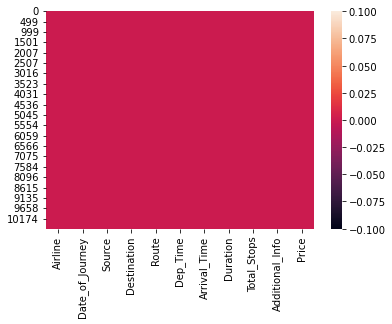

In [19]:
#Looking for missing value
sns.heatmap(data.isna())
plt.show()

In [20]:
# Now there is null value in dataset

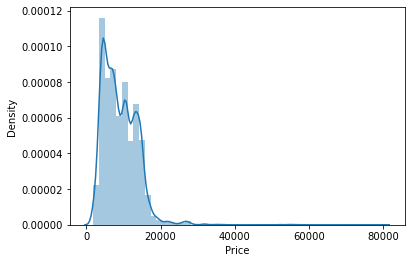

In [21]:
sns.distplot(data['Price'])
plt.show()

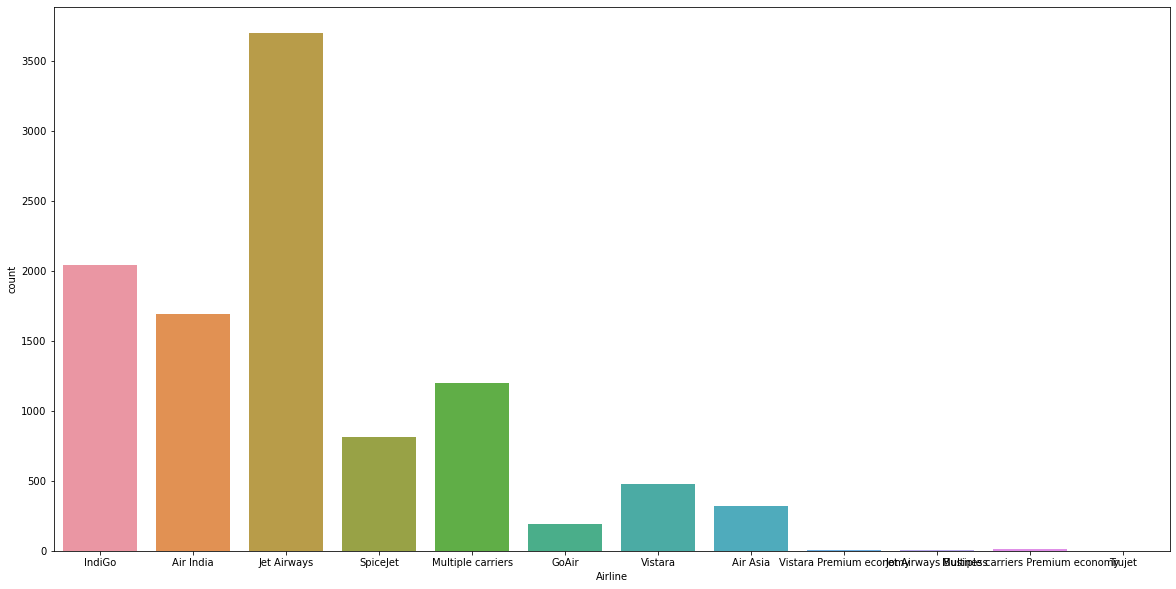

In [22]:
plt.figure(figsize=(20,10))
sns.countplot(data['Airline'])
plt.show()

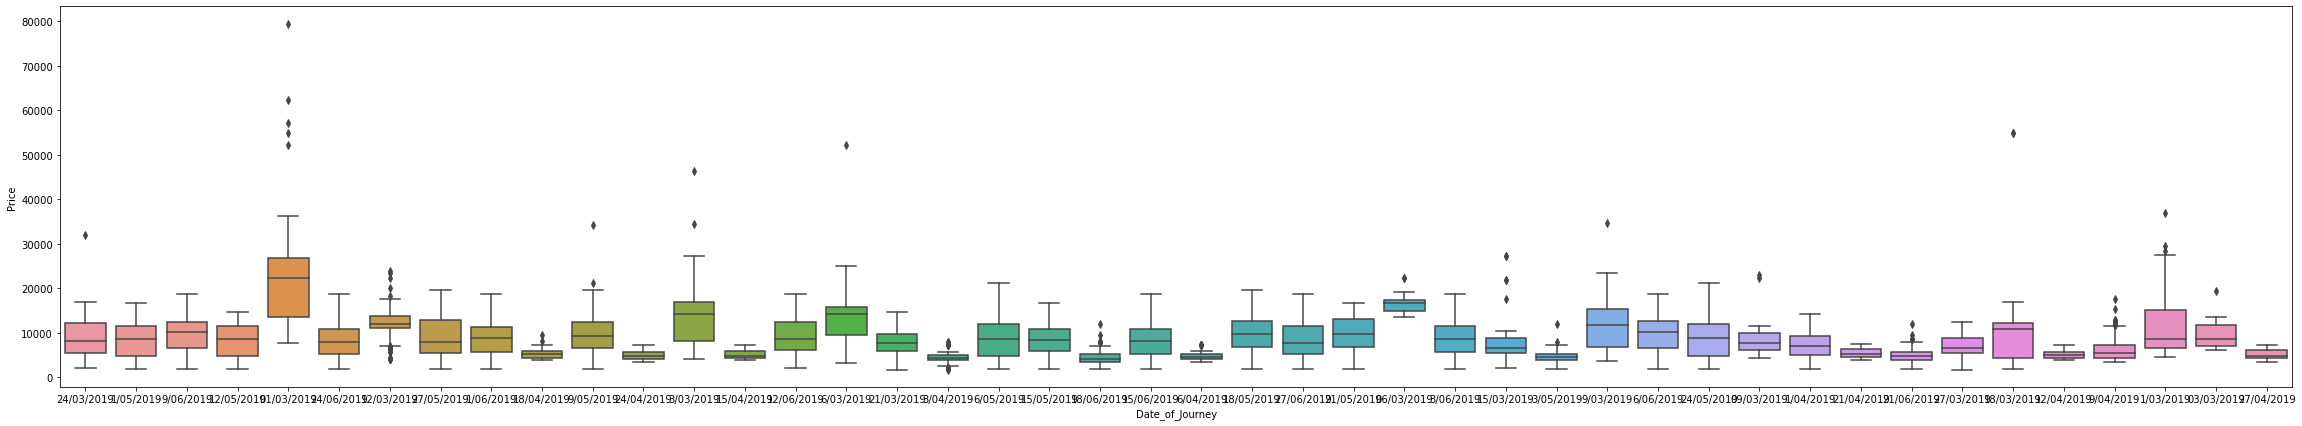

In [23]:
plt.figure(figsize=(40,7))
sns.boxplot(data['Date_of_Journey'],data['Price'])
plt.show()

In [24]:
data['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

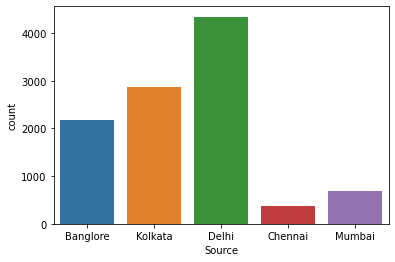

In [25]:
sns.countplot(data['Source'])
plt.show()

In [26]:
data["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

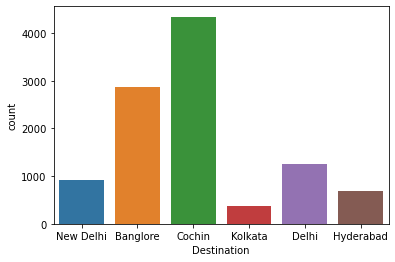

In [27]:
sns.countplot(data['Destination'])
plt.show()

In [28]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

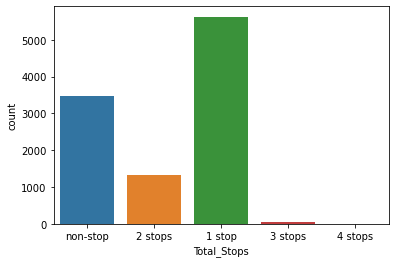

In [29]:
sns.countplot(data['Total_Stops'])
plt.show()

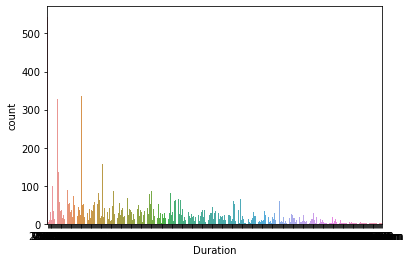

In [30]:
sns.countplot(data['Duration'])
plt.show()

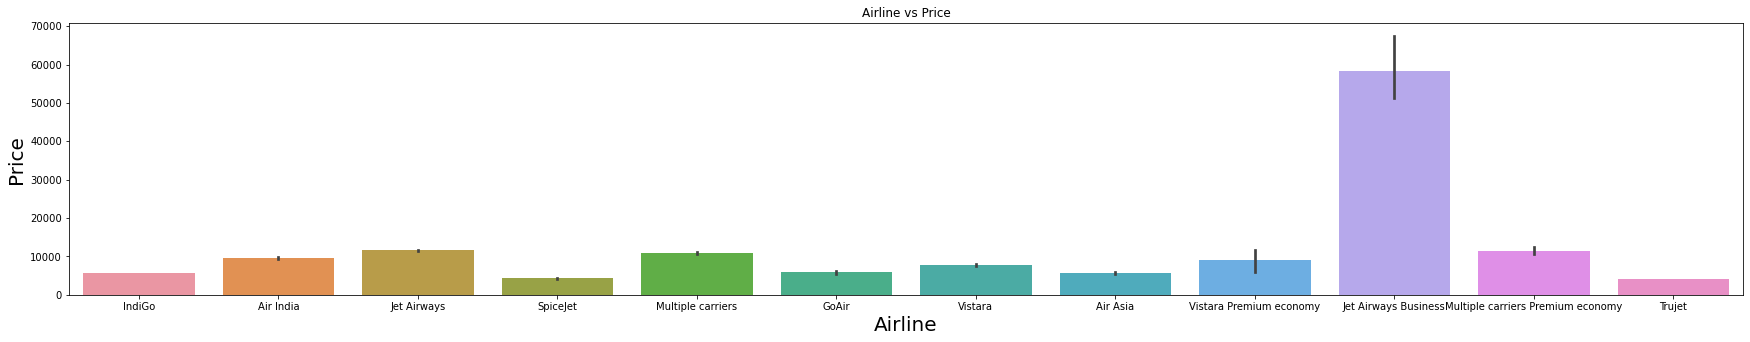

In [31]:
plt.figure(figsize = (30,5), facecolor='white')
sns.barplot(data['Airline'], data['Price'])
plt.xlabel('Airline', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Airline vs Price')
plt.show()

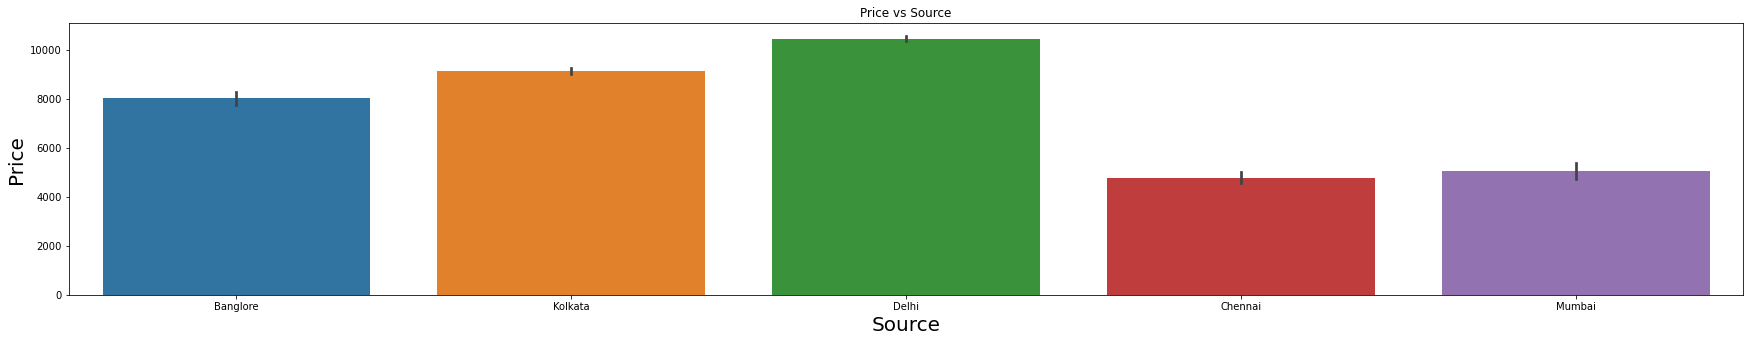

In [32]:
plt.figure(figsize=(30,5),facecolor='white')
sns.barplot(data['Source'],data['Price'])
plt.xlabel('Source',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Price vs Source')
plt.show()

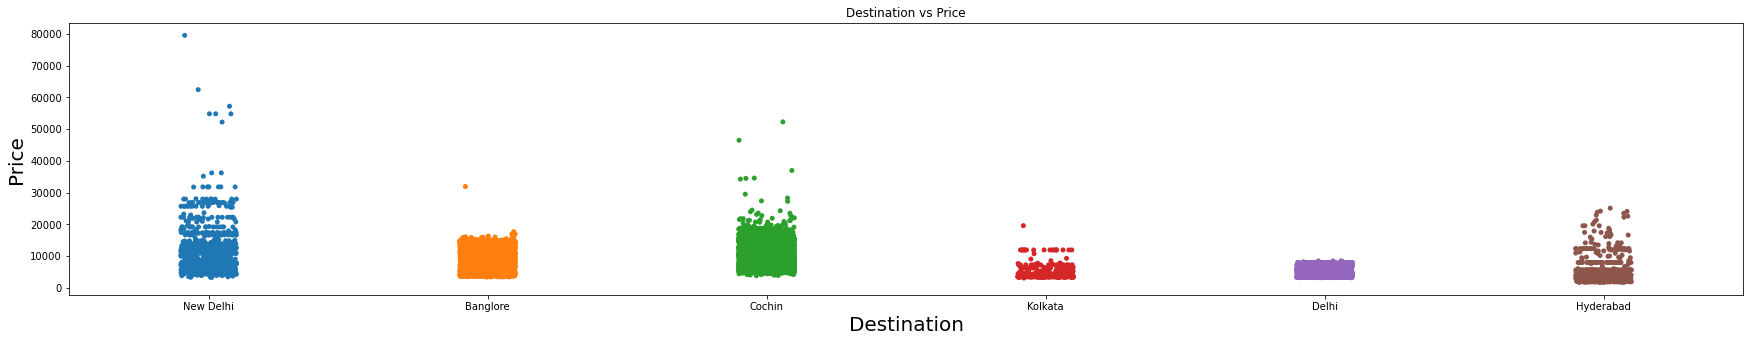

In [33]:
plt.figure(figsize = (30,5), facecolor='white')
sns.stripplot(data['Destination'], data['Price'])
plt.xlabel('Destination', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Destination vs Price')
plt.show()

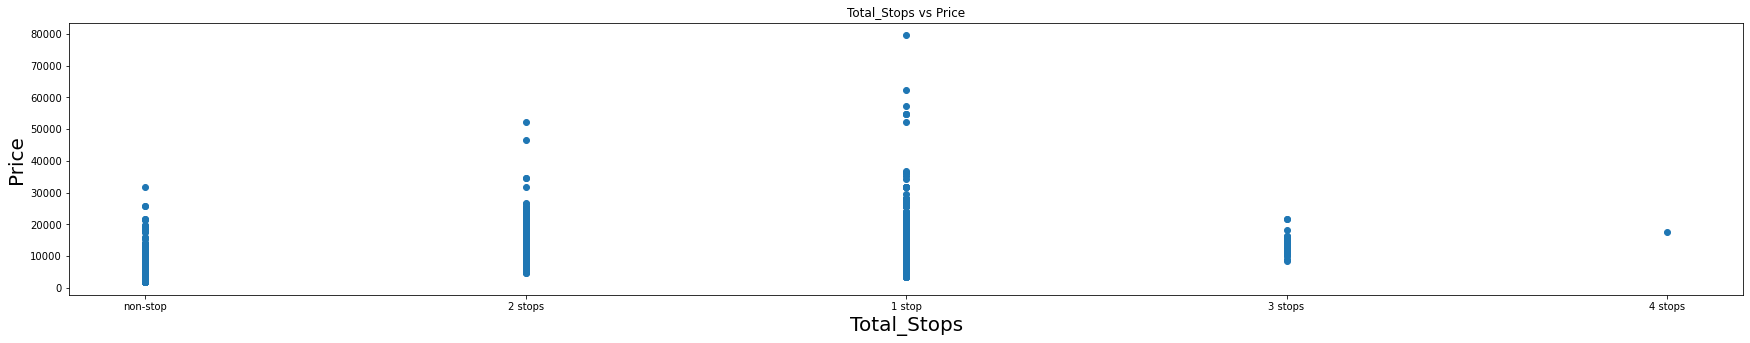

In [34]:
plt.figure(figsize = (30,5), facecolor='white')
plt.scatter(data['Total_Stops'], data['Price'])
plt.xlabel('Total_Stops', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Total_Stops vs Price')
plt.show()

In [35]:
data['Date'] = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year'] = data['Date_of_Journey'].str.split('/').str[2]

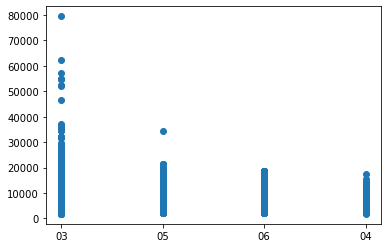

In [36]:
plt.scatter(x=data['Month'],y=data['Price'])
plt.show()

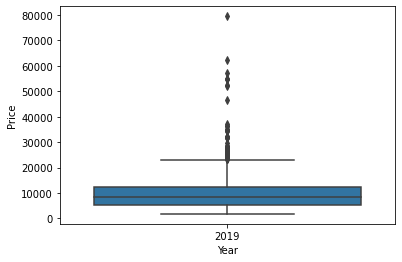

In [37]:
sns.boxplot(x=data['Year'],y=data['Price'])
plt.show()

In [38]:
data['Route1']=data['Route'].str.split('→').str[0]
data['Route2']=data['Route'].str.split('→').str[1]
data['Route3']=data['Route'].str.split('→').str[2]
data['Route4']=data['Route'].str.split('→').str[3]
data['Route5']=data['Route'].str.split('→').str[4]

In [39]:
data['Route1'].isna().sum()

0

In [40]:
data['Route2'].isna().sum()

0

In [41]:
data['Route3'].isna().sum()

3475

In [42]:
data['Route3'].fillna(data['Route3'].mode()[0],inplace=True)

In [43]:
data['Route3'].isna().sum()

0

In [44]:
data['Route4'].isna().sum()

9100

In [45]:
data['Route4'].fillna(data['Route4'].mode()[0],inplace=True)

In [46]:
data['Route4'].isna().sum()

0

In [47]:
data['Route5'].isna().sum()

10418

In [48]:
data['Route5'].fillna(data['Route5'].mode()[0],inplace=True)

In [49]:
data['Route5'].isna().sum()

0

In [50]:
data.drop(['Route4','Route5'],axis=1,inplace=True)

In [51]:
data['Dep_Hours']=data['Dep_Time'].str.split(':').str[0].astype('int')
data['Dep_Minutes']=data['Dep_Time'].str.split(':').str[0].astype('int')

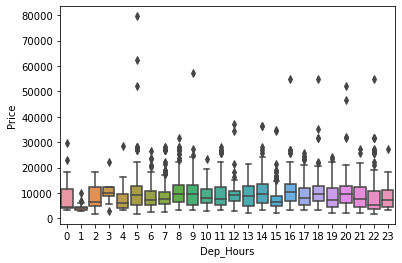

In [52]:
sns.boxplot(x=data['Dep_Hours'],y=data['Price'])
plt.show()

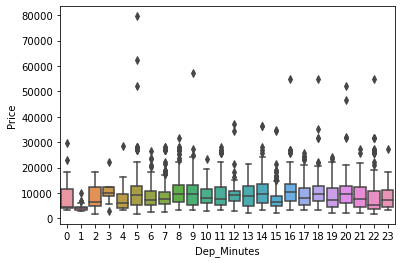

In [53]:
sns.boxplot(x=data['Dep_Minutes'],y=data['Price'])
plt.show()

In [54]:
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]

In [55]:
data['Arrival_Hour']=data['Arrival_Time'].str.split(':').str[0]

In [56]:
data['Arrival_Hour']=data['Arrival_Hour'].astype('int')

In [57]:
data['Arrival_Minute']=data['Arrival_Time'].str.split(':').str[1]

In [58]:
data['Arrival_Minute']=data['Arrival_Minute'].astype('int')

In [59]:
data['Duration_Hours']=data['Duration'].str.split('h').str[0]

In [60]:
data['Duration_Hours']=data['Duration_Hours'].replace('5m','0')

In [61]:
data['Duration_Hours']=data['Duration_Hours'].astype('int')

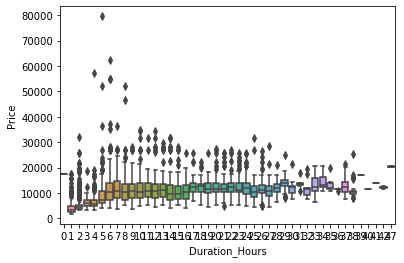

In [62]:
sns.boxplot(x=data['Duration_Hours'],y=data['Price'])
plt.show()

In [63]:
data['Duration_Minutes']=data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [64]:
data['Duration_Minutes']=data['Duration_Minutes'].fillna(data['Duration_Minutes'].mode()[0])

In [65]:
data['Duration_Minutes']=data['Duration_Minutes'].astype('int')

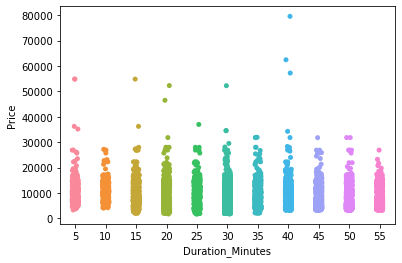

In [66]:
sns.stripplot(x=data['Duration_Minutes'],y=data['Price'])
plt.show()

In [67]:
data.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time','Duration'],axis=1,inplace=True)

In [68]:
object_columns = []
for i in data.columns:
    if data[i].dtypes=='object':
        object_columns.append(i)

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for j in object_columns:
    data[j] = le.fit_transform(data[j])

In [70]:
data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,1.953642,1.439495,1.463105,7.396483,9026.790289,8.417320,1.701491,0.0,2.004970,11.784649,5.738960,12.478494,12.478494,13.387689,24.719939,10.026190,31.094437
std,2.364627,1.186327,1.481015,1.821371,1.212030,4624.849541,3.223474,1.163802,0.0,1.208648,7.833805,2.659753,5.727227,5.727227,6.855547,16.570450,8.378023,14.155880
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,5224.000000,6.000000,0.000000,0.0,1.000000,7.000000,4.000000,8.000000,8.000000,8.000000,10.000000,2.000000,20.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,8266.000000,9.000000,2.000000,0.0,2.000000,7.000000,6.000000,11.000000,11.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,12344.750000,11.000000,3.000000,0.0,3.000000,14.000000,6.000000,18.000000,18.000000,19.000000,35.000000,15.000000,45.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,79512.000000,13.000000,3.000000,0.0,4.000000,44.000000,28.000000,23.000000,23.000000,23.000000,55.000000,47.000000,55.000000


In [71]:
data.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Route1,Route2,Route3,Dep_Hours,Dep_Minutes,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.012172,0.015942,0.034396,-0.058220,-0.036491,0.025755,0.026083,NaN,0.039836,-0.063741,-0.089960,-0.032267,-0.032267,-0.005438,-0.073045,-0.151962,-0.028782
Source,-0.012172,1.000000,-0.589992,-0.222859,-0.021587,0.013796,0.186842,0.181072,NaN,0.437508,0.036686,-0.224964,0.060218,0.060218,0.028257,0.021392,0.167051,-0.237278
Destination,0.015942,-0.589992,1.000000,0.334097,0.024922,-0.065875,-0.291621,-0.362186,NaN,-0.479180,0.084999,0.344581,-0.074056,-0.074056,-0.044605,0.016351,-0.255273,0.059539
Total_Stops,0.034396,-0.222859,0.334097,1.000000,0.164639,-0.571991,-0.034467,-0.021409,NaN,-0.442580,0.040194,0.113399,0.040310,0.040310,-0.099351,0.176743,-0.613582,0.186927
Additional_Info,-0.058220,-0.021587,0.024922,0.164639,1.000000,-0.068779,0.018741,-0.049186,NaN,0.020189,0.096554,0.099777,-0.059406,-0.059406,0.021293,0.044321,-0.171039,0.048307
Price,-0.036491,0.013796,-0.065875,-0.571991,-0.068779,1.000000,-0.073780,-0.113396,NaN,0.173508,-0.098391,-0.016138,0.005155,0.005155,0.031023,-0.086163,0.504200,-0.120346
Date,0.025755,0.186842,-0.291621,-0.034467,0.018741,-0.073780,1.000000,0.115311,NaN,0.274491,0.004873,-0.061170,-0.006545,-0.006545,-0.008057,-0.025292,0.018603,-0.038553
Month,0.026083,0.181072,-0.362186,-0.021409,-0.049186,-0.113396,0.115311,1.000000,NaN,0.224097,0.037930,-0.205867,0.040406,0.040406,0.001423,-0.099261,0.006410,-0.018406
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route1,0.039836,0.437508,-0.479180,-0.442580,0.020189,0.173508,0.274491,0.224097,NaN,1.000000,-0.098768,-0.119493,-0.047462,-0.047462,0.021514,-0.172785,0.283602,-0.300543


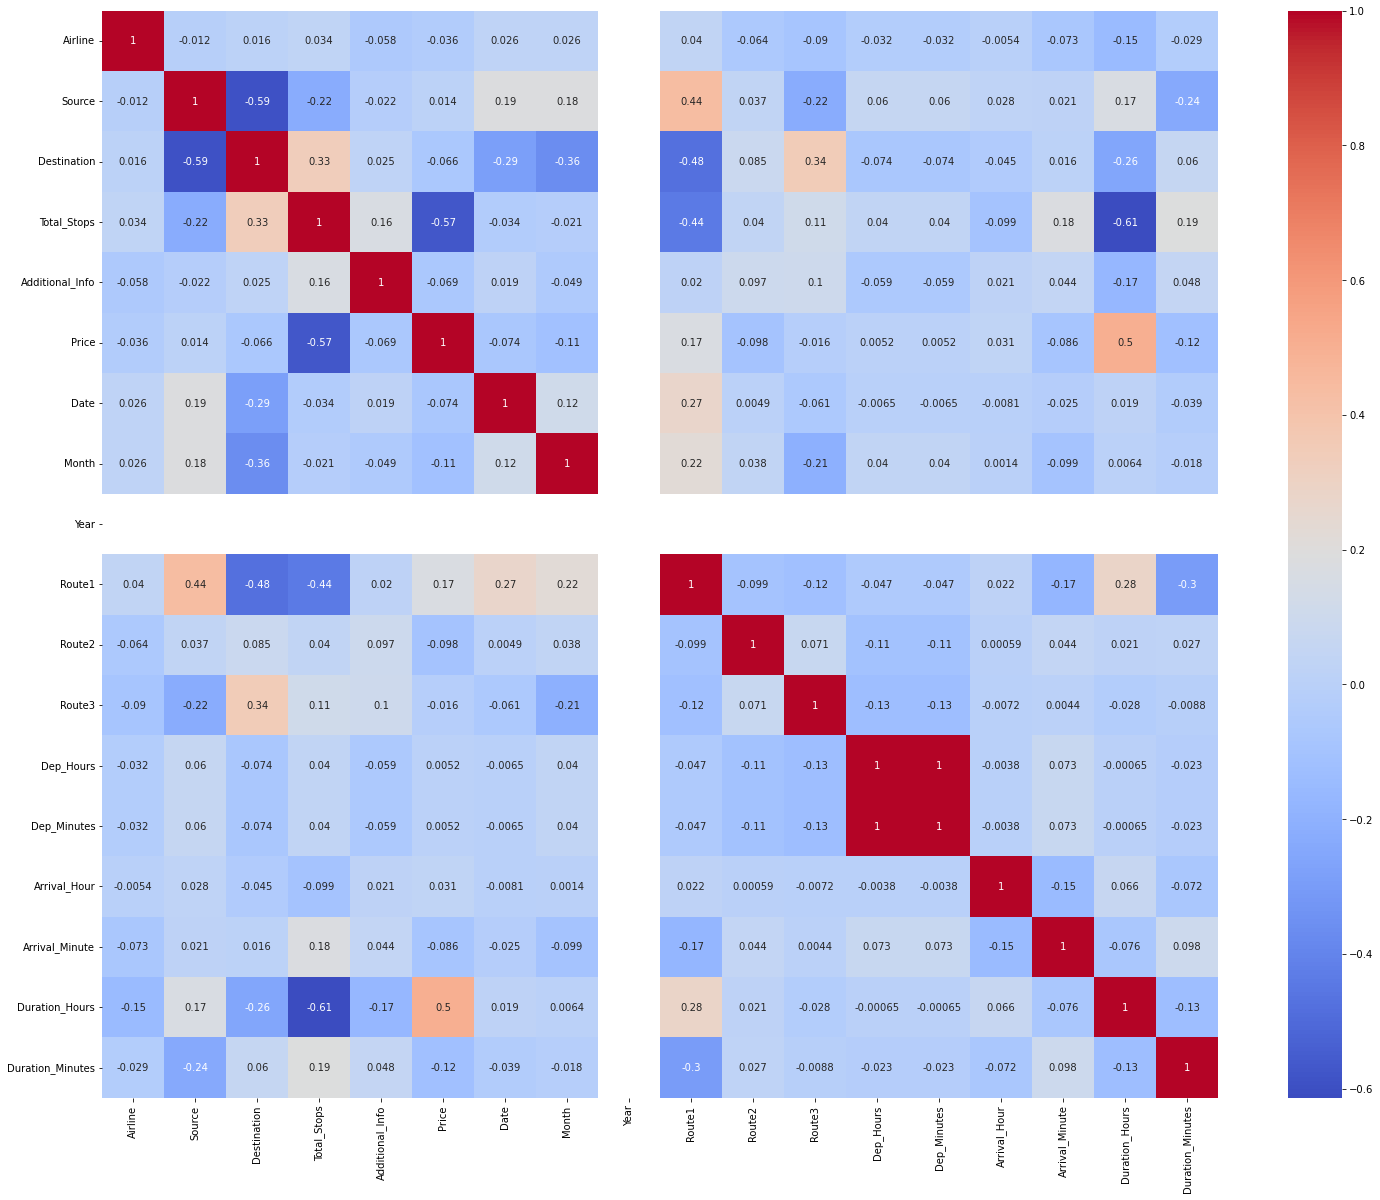

In [72]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

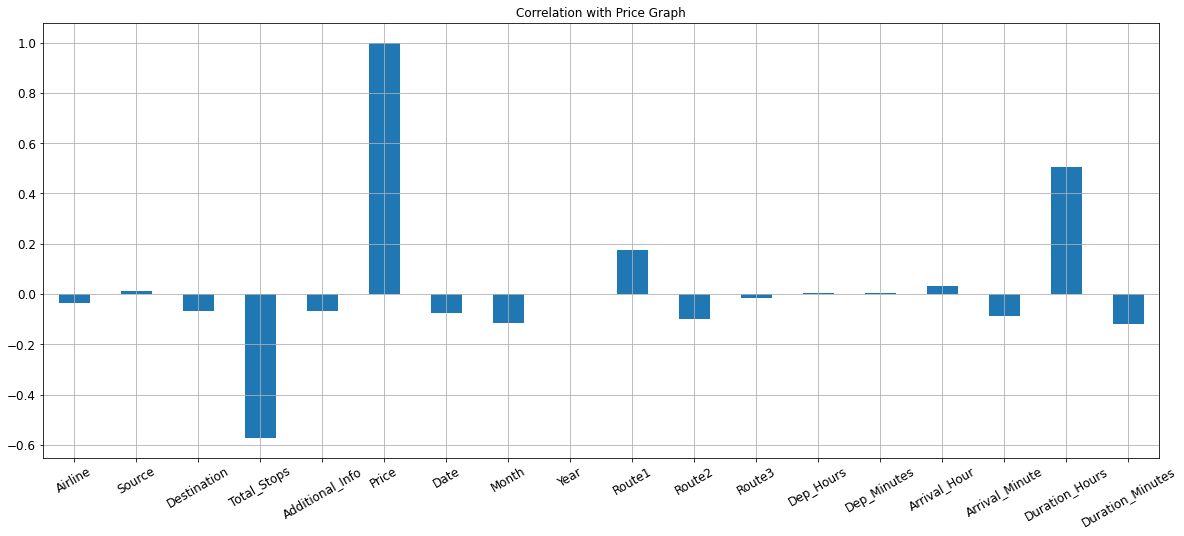

In [73]:
data.corrwith(data.Price).plot.bar(
        figsize = (20, 8), title = "Correlation with Price Graph", fontsize = 12,
        rot = 30, grid = True)
plt.show()

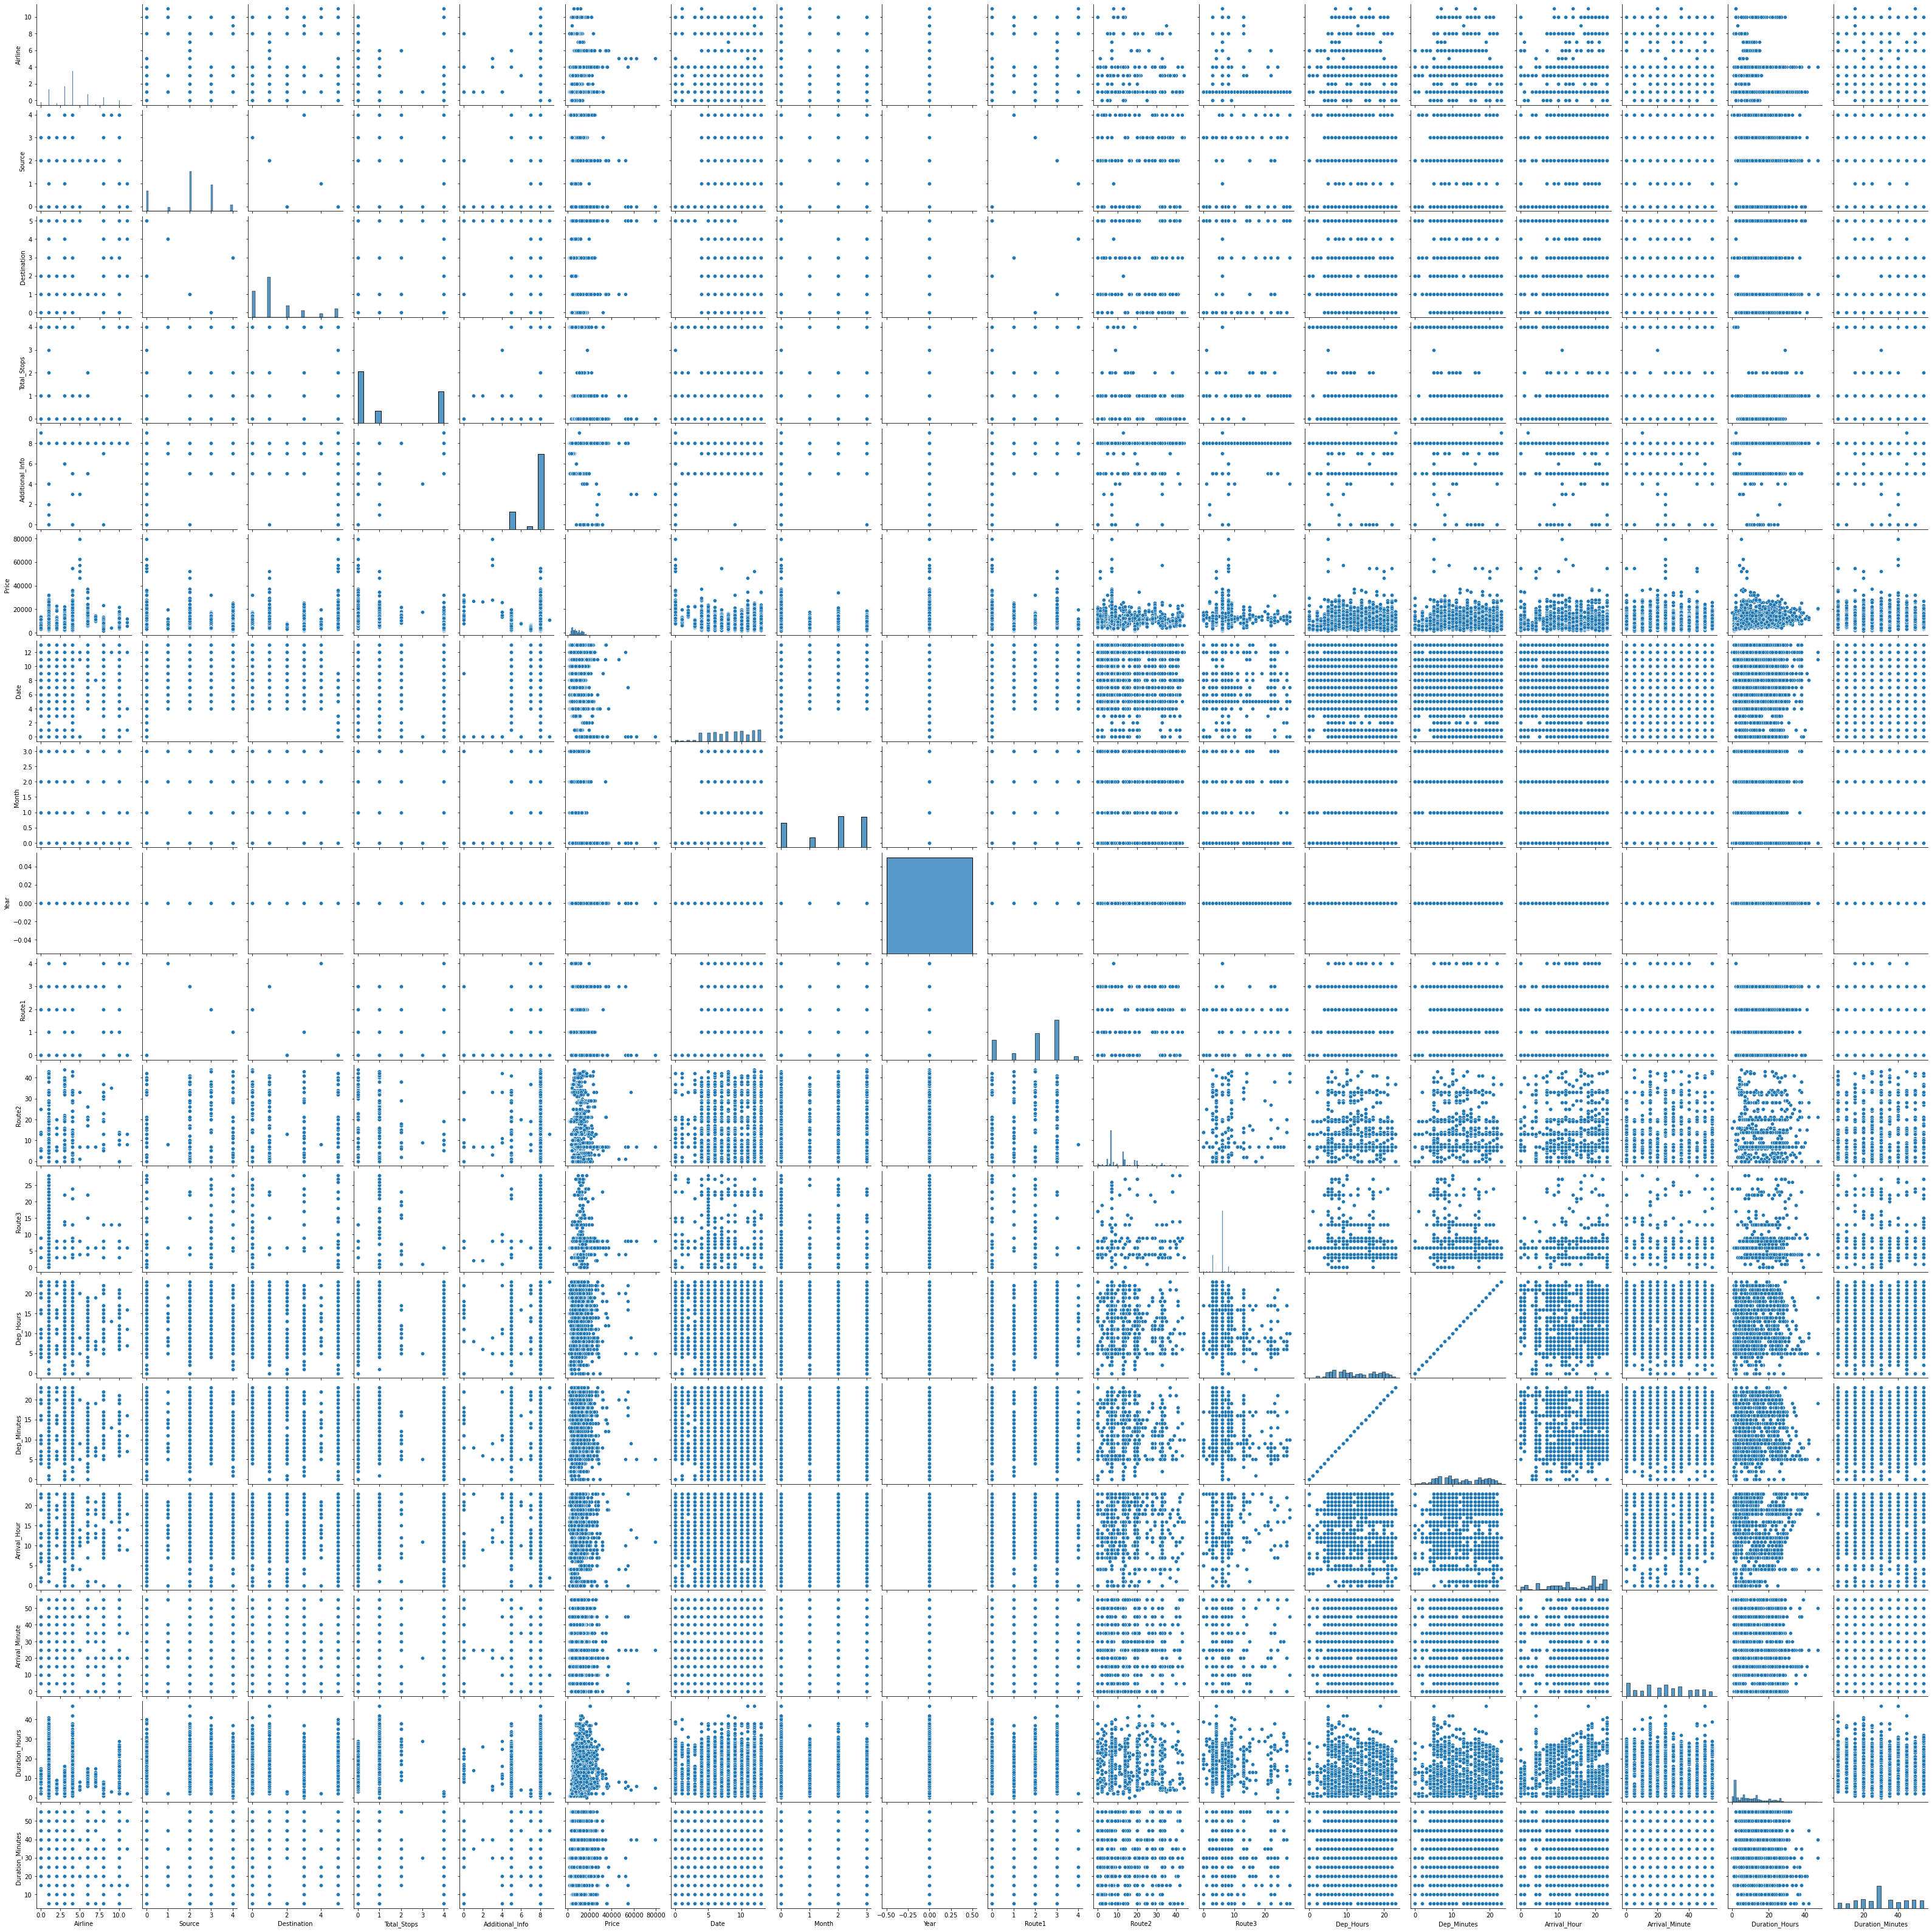

In [74]:
sns.pairplot(data)
plt.show()

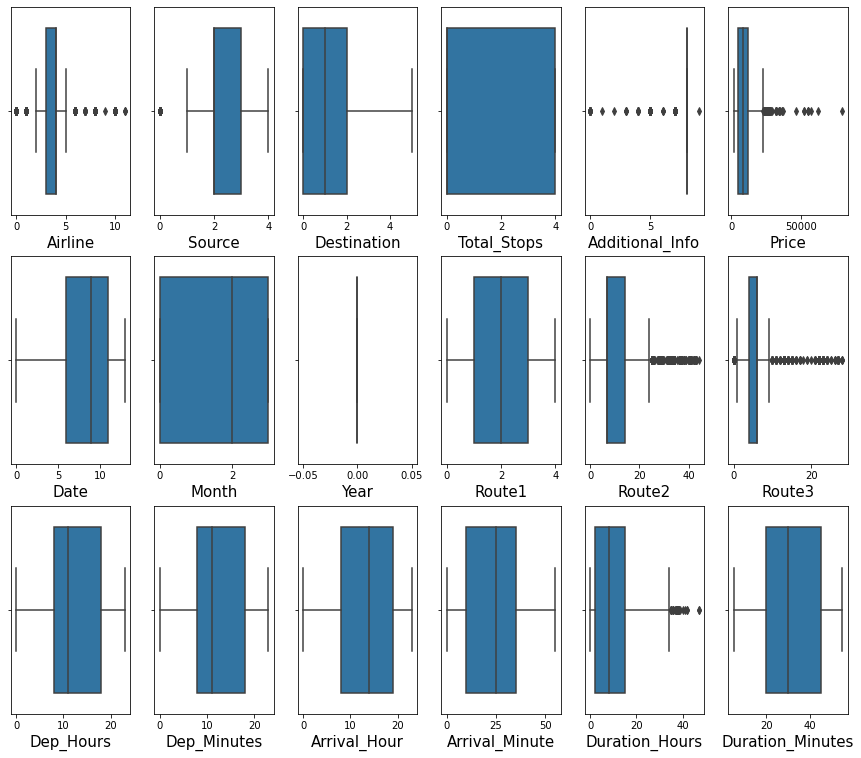

In [75]:
plt.figure(figsize=(15,13), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(3,6,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [76]:
data.skew()

Airline             0.723567
Source             -0.419669
Destination         1.225081
Total_Stops         0.617105
Additional_Info    -1.796501
Price               1.857490
Date               -0.304317
Month              -0.377535
Year                0.000000
Route1             -0.593710
Route2              1.491868
Route3              4.061959
Dep_Hours           0.108306
Dep_Minutes         0.108306
Arrival_Hour       -0.378978
Arrival_Minute      0.110802
Duration_Hours      0.892650
Duration_Minutes   -0.004311
dtype: float64

In [77]:
x = data.drop(["Price"], axis=1)
y = data["Price"]

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(x)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0

maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaler,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.45681935550922204  on Random_state  123


In [80]:
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y,test_size=.30,random_state=maxRS)

In [81]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]

In [82]:
for m in model:
    print("*******************************************************************************")
    
    print('accuracy score of ->', m)
    
    m.fit(x_train,y_train)
    
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y_test,pred))
    
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    
    score=cross_val_score(m,x,y,cv=5)
    
    print(score)
    
    print("cross validation score:  ", abs(score.mean()))
    
    print("Difference between R2 score and cross validatio score is -> ",r2_score(y_test,pred)-abs(score.mean()))
    
    print("--------------------------------**********************--------------------------------------")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.45681935550922204
Mean Absolute Error:      2412.5692246549897
Mean Squared error:       10280991.974585121
Root Mean Squared Error:  3206.3985988309564
[0.41978737 0.41515499 0.41828732 0.39644881 0.39190795]
cross validation score:   0.40831728978890985
Difference between R2 score and cross validatio score is ->  0.04850206572031218
--------------------------------**********************--------------------------------------
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.8950172300981706
Mean Absolute Error:      666.8478553224411
Mean Squared error:       1987049.843873348
Root Mean Squared Error:  1409.6275550205976
[0.87494983 0.88089207 0.87923636 0.88369175 0.85384182]
cross validation score:   0.8745223652773882
Difference betwee

In [83]:
params={'n_estimators':range(0,200),
        'learning_rate':[.001,0.01,.1],
        'max_depth':[1,2,4],
        'subsample':[.5,.75,1]}

In [84]:
gridsearch = GridSearchCV(GradientBoostingRegressor(), param_grid=params,cv = 3, n_jobs = -1)

In [85]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 4], 'n_estimators': range(0, 200),
                         'subsample': [0.5, 0.75, 1]})

In [86]:
print(gridsearch.best_params_)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 189, 'subsample': 0.75}


In [87]:
gbr = gridsearch.best_estimator_

In [88]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=189, subsample=0.75)

In [89]:
print(gbr.score(x_test,y_test))

0.8793408005162376


In [90]:
y_pred = gbr.predict(x_test)

In [91]:
accuracy = r2_score(y_test,y_pred)

In [93]:
print(accuracy)

0.8793408005162376


In [97]:
import joblib 
joblib.dump(gbr,"Flight_Ticket_Participant_Datasets_Train.pkl")

['Flight_Ticket_Participant_Datasets_Train.pkl']

In [100]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [101]:
pd.set_option('display.max.rows',None)

In [102]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [103]:
test_data.shape

(2671, 10)

In [104]:
test_data.drop_duplicates(inplace = True)

In [105]:
test_data.shape

(2645, 10)

In [106]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [107]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: object(10)
memory usage: 227.3+ KB


In [108]:
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

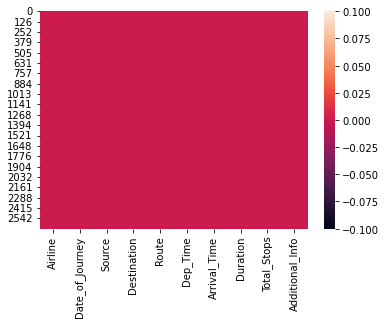

In [109]:
sns.heatmap(test_data.isna())
plt.show()

In [110]:
test_data['Date']=test_data['Date_of_Journey'].str.split('/').str[0]
test_data['Month']=test_data['Date_of_Journey'].str.split('/').str[1]
test_data['Year']=test_data['Date_of_Journey'].str.split('/').str[2]

In [111]:
test_data['Route'].unique()

array(['DEL → BOM → COK', 'CCU → MAA → BLR', 'BLR → DEL',
       'BLR → TRV → DEL', 'CCU → HYD → BLR', 'CCU → BLR',
       'CCU → BOM → BLR', 'DEL → MAA → BOM → COK', 'DEL → HYD → COK',
       'BLR → BOM → DEL', 'CCU → DEL → BLR', 'DEL → JAI → BOM → COK',
       'DEL → BHO → BOM → COK', 'BOM → HYD', 'CCU → PNQ → BLR',
       'MAA → CCU', 'CCU → BOM → COK → BLR', 'DEL → BLR → COK',
       'DEL → HYD → MAA → COK', 'DEL → MAA → COK',
       'CCU → IXR → BBI → BOM → BLR', 'CCU → DEL → AMD → BLR',
       'DEL → COK', 'CCU → JAI → BOM → BLR', 'DEL → LKO → COK',
       'CCU → IXB → BLR', 'DEL → CCU → BOM → COK',
       'CCU → GAU → DEL → BLR', 'BLR → COK → DEL',
       'BLR → BOM → NAG → DEL', 'CCU → BBI → BOM → BLR',
       'BLR → AMD → DEL', 'BOM → DEL → HYD', 'DEL → GOI → BOM → COK',
       'DEL → IXU → BOM → COK', 'DEL → HYD → BOM → COK',
       'CCU → DEL → COK → BLR', 'BLR → GOI → DEL',
       'BLR → BOM → BHO → DEL', 'DEL → IDR → BOM → COK',
       'DEL → AMD → BOM → COK', 'DEL → RPR →

In [112]:
test_data['Route1']=test_data['Route'].str.split('→').str[0]
test_data['Route2']=test_data['Route'].str.split('→').str[1]
test_data['Route3']=test_data['Route'].str.split('→').str[2]
test_data['Route4']=test_data['Route'].str.split('→').str[3]
test_data['Route5']=test_data['Route'].str.split('→').str[4]

In [113]:
test_data['Route1'].isna().sum()

0

In [114]:
test_data['Route2'].isna().sum()

0

In [115]:
test_data['Route3'].isna().sum()

846

In [116]:
test_data['Route3']=test_data['Route3'].fillna(test_data['Route3'].mode()[0])

In [117]:
test_data['Route4'].isna().sum()

2273

In [118]:
test_data['Route5'].isna().sum()

2633

In [119]:
test_data.drop(['Route4','Route5'],axis=1,inplace=True)

In [120]:
test_data['Dep_hours']=test_data['Dep_Time'].str.split(':').str[0]
test_data['Dep_Minutes']=test_data['Dep_Time'].str.split(':').str[1]

In [121]:
test_data['Dep_hours']=test_data['Dep_hours'].astype('int')
test_data['Dep_Minutes']=test_data['Dep_Minutes'].astype('int')

In [122]:
test_data['Arrival_Time']=test_data['Arrival_Time'].str.split(' ').str[0]

In [123]:
test_data['Arrival_Hours'] =test_data['Arrival_Time'].str.split(':').str[0].astype('int')
test_data['Arrival_Minutes'] =test_data['Arrival_Time'].str.split(':').str[1].astype('int')

In [124]:
test_data['Duration_Hours']=test_data['Duration'].str.split('h').str[0]

In [125]:
test_data['Duration_Hours']=test_data['Duration_Hours'].replace('5m','0')

In [126]:
test_data['Duration_Hours']=test_data['Duration_Hours'].astype('int')

In [127]:
test_data['Duration_Minutes']=test_data['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [128]:
test_data['Duration_Minutes']=test_data['Duration_Minutes'].fillna(test_data['Duration_Minutes'].mode()[0])

In [129]:
test_data['Duration_Minutes']=test_data['Duration_Minutes'].astype('int')

In [130]:

test_data.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time','Duration'],axis=1,inplace=True)

In [131]:
object_dtypes=[]
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        object_dtypes.append(i)

In [132]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for j in object_dtypes:
    test_data[j]= le.fit_transform(test_data[j])

In [133]:
test_data.shape

(2645, 17)

In [134]:
test_data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Route1,Route2,Route3,Dep_hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.0,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000
mean,3.979962,1.963705,1.430624,1.424953,4.634026,8.413611,1.715690,0.0,1.996597,11.401890,4.967486,12.615879,24.896030,13.597353,24.559546,10.122117,31.170132
std,2.299275,1.186554,1.465761,1.801239,0.761135,3.271126,1.170134,0.0,1.200884,6.903643,2.250164,5.679266,19.088499,7.025676,16.794025,8.370658,13.971327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.000000,2.000000,0.000000,0.000000,5.000000,6.000000,0.000000,0.0,1.000000,7.000000,4.000000,8.000000,5.000000,8.000000,10.000000,2.000000,20.000000
50%,4.000000,2.000000,1.000000,0.000000,5.000000,9.000000,2.000000,0.0,2.000000,7.000000,5.000000,12.000000,25.000000,15.000000,25.000000,8.000000,30.000000
75%,6.000000,3.000000,2.000000,4.000000,5.000000,11.000000,3.000000,0.0,3.000000,14.000000,5.000000,18.000000,45.000000,19.000000,35.000000,15.000000,45.000000
max,10.000000,4.000000,5.000000,4.000000,5.000000,13.000000,3.000000,0.0,4.000000,38.000000,26.000000,23.000000,55.000000,23.000000,55.000000,40.000000,55.000000


In [135]:
test_data.corr()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Route1,Route2,Route3,Dep_hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.032706,0.036453,0.040503,-0.083506,0.014981,0.048208,NaN,0.028193,-0.081124,-0.111242,0.006072,-0.048520,-0.017638,-0.096854,-0.177991,-0.046188
Source,-0.032706,1.000000,-0.575119,-0.211329,-0.024345,0.167964,0.166904,NaN,0.445305,0.035579,-0.186437,0.058995,-0.062953,0.007048,-0.004978,0.154173,-0.247485
Destination,0.036453,-0.575119,1.000000,0.329479,0.024695,-0.281380,-0.348673,NaN,-0.519151,0.097188,0.325446,-0.053725,0.151377,-0.012942,0.031984,-0.247350,0.076225
Total_Stops,0.040503,-0.211329,0.329479,1.000000,0.136930,-0.037160,-0.006718,NaN,-0.478596,0.083498,0.059026,0.069831,0.050401,-0.100582,0.194047,-0.596193,0.189437
Additional_Info,-0.083506,-0.024345,0.024695,0.136930,1.000000,0.030894,-0.011131,NaN,0.027602,0.103866,0.085578,-0.076193,0.009225,0.006453,0.034430,-0.143172,0.029438
Date,0.014981,0.167964,-0.281380,-0.037160,0.030894,1.000000,0.092095,NaN,0.247319,0.019483,-0.034552,-0.016018,-0.035684,-0.008665,-0.002397,0.013487,-0.016304
Month,0.048208,0.166904,-0.348673,-0.006718,-0.011131,0.092095,1.000000,NaN,0.223517,0.024871,-0.216968,0.018846,-0.108170,0.004518,-0.144564,-0.021283,-0.025912
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route1,0.028193,0.445305,-0.519151,-0.478596,0.027602,0.247319,0.223517,NaN,1.000000,-0.111788,-0.130629,-0.084706,-0.060485,0.010417,-0.211895,0.303149,-0.302845
Route2,-0.081124,0.035579,0.097188,0.083498,0.103866,0.019483,0.024871,NaN,-0.111788,1.000000,0.090049,-0.141694,0.087265,0.023877,0.068760,-0.007460,0.036217


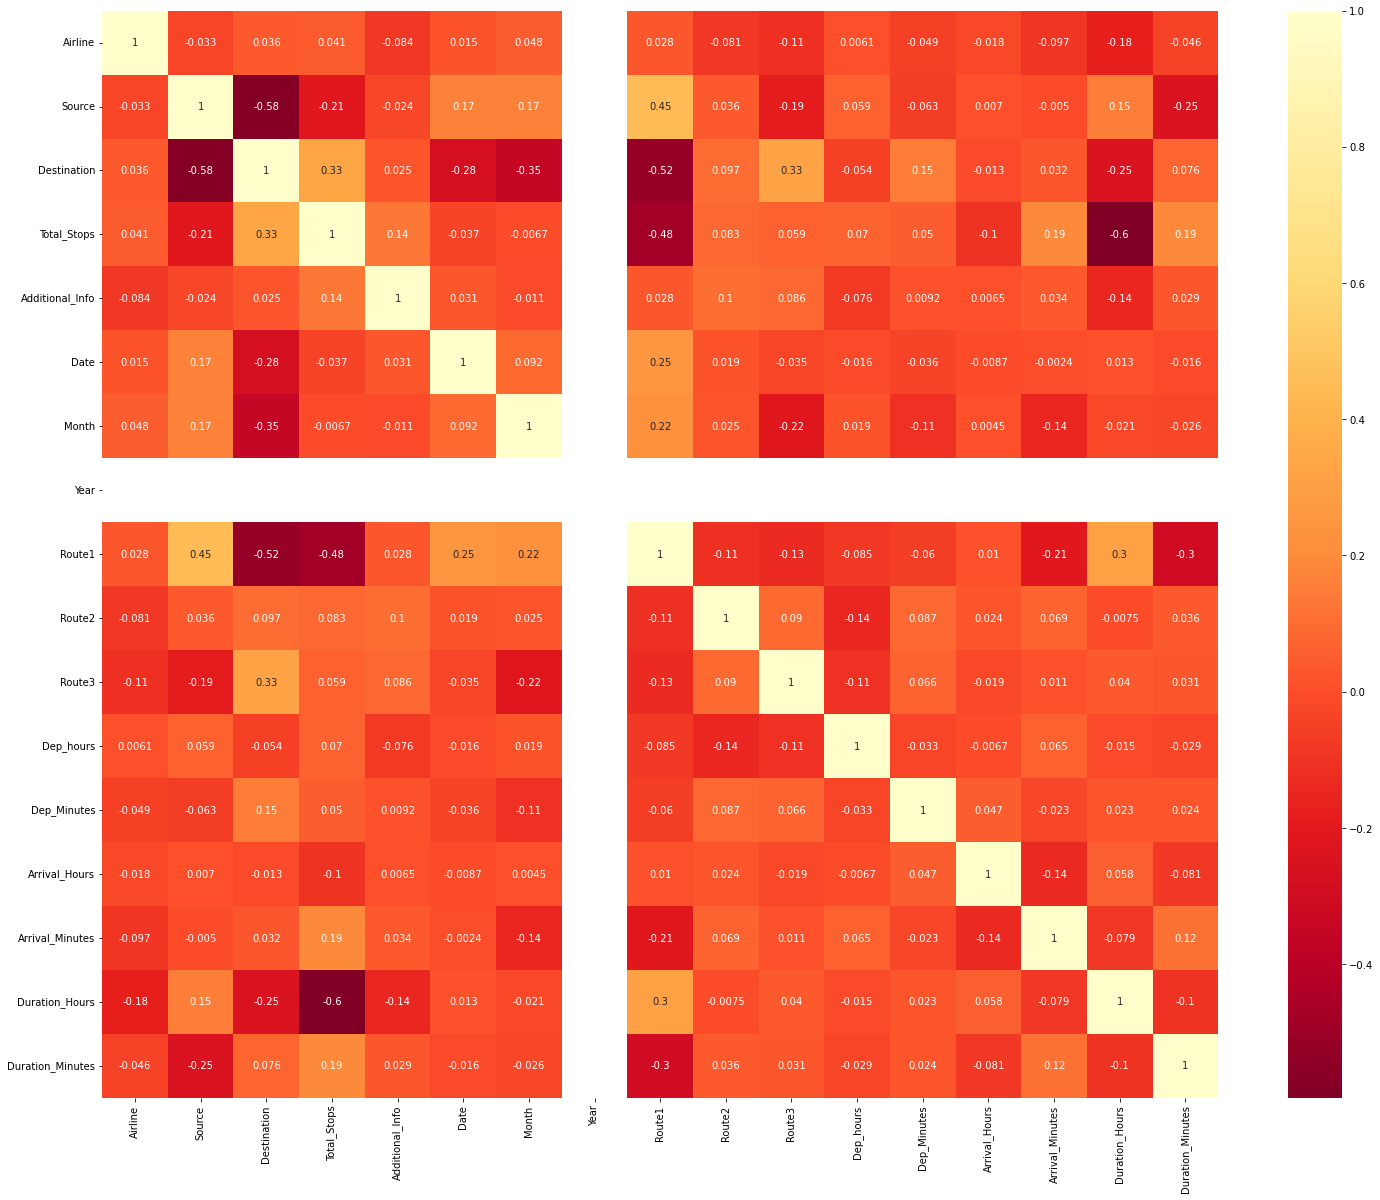

In [136]:
plt.figure(figsize=(25,20))
sns.heatmap(test_data.corr(),cmap='YlOrRd_r',annot=True)
plt.show()

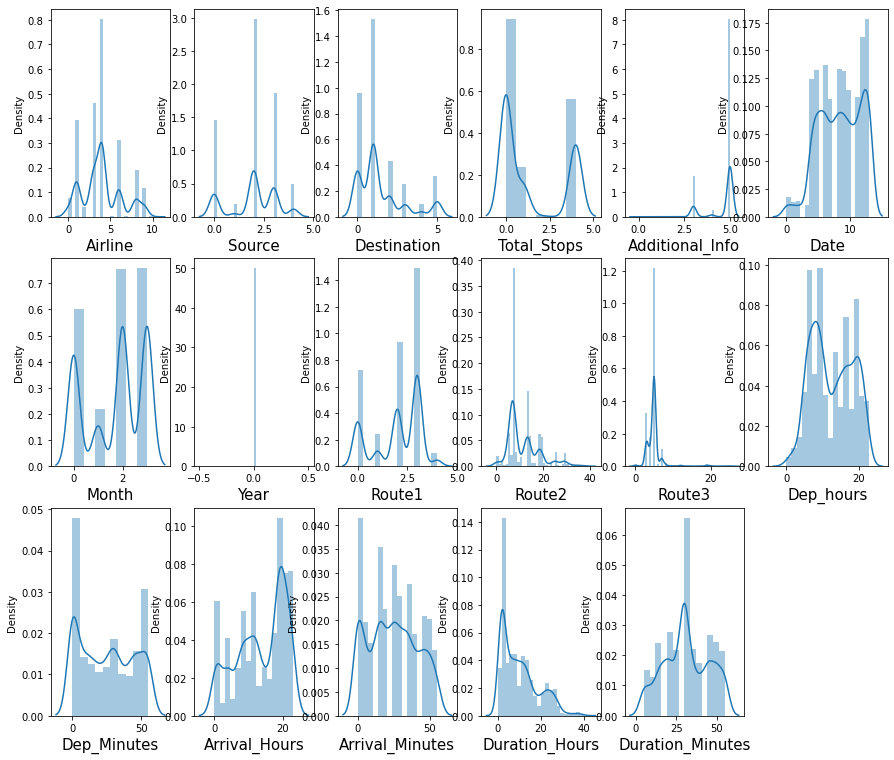

In [137]:
plt.figure(figsize=(15,13), facecolor='white')
plotnumber = 1

for column in test_data:
    if plotnumber<=18 :     # as there are 17 columns in the data
        ax = plt.subplot(3,6,plotnumber)
        sns.distplot(test_data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [138]:
test_data.skew()

Airline             0.482621
Source             -0.424718
Destination         1.260252
Total_Stops         0.666765
Additional_Info    -1.717307
Date               -0.265024
Month              -0.400537
Year                0.000000
Route1             -0.616347
Route2              1.196607
Route3              4.806541
Dep_hours           0.089146
Dep_Minutes         0.129932
Arrival_Hours      -0.447350
Arrival_Minutes     0.113229
Duration_Hours      0.901931
Duration_Minutes   -0.004593
dtype: float64

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(test_data)

In [140]:
import joblib
Price= joblib.load("Flight_Ticket_Participant_Datasets_Train.pkl")
Price_prediction = Price.predict(test_data)
Price_prediction

array([15370.92047191, 14080.20485523, 15281.48826671, ...,
       15482.7124395 , 16793.60563857, 15370.92047191])

In [141]:
Flight=pd.DataFrame({"Flight Price":Price_prediction})
Flight.head()

,Flight Price
0,15370.920472
1,14080.204855
2,15281.488267
3,15141.018533
4,16757.268178
